In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#######################################
###!@0 START INIT ENVIRONMENT
!ls /content/drive/Shareddrives/DA231o-2024-shared/assignments/SparkData/spark-3.5.2-bin-hadoop3.tgz
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!tar xf /content/drive/Shareddrives/DA231o-2024-shared/assignments/SparkData/spark-3.5.2-bin-hadoop3.tgz
!pip install -q findspark
!pip install -q pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.2-bin-hadoop3"
###!@0 END INIT ENVIRONMENT

/content/drive/Shareddrives/DA231o-2024-shared/assignments/SparkData/spark-3.5.2-bin-hadoop3.tgz


In [8]:
#######################################
###!@1 START OF PYSPARK INIT
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
input_type = 'sample'
spark = SparkSession.builder\
         .master("local")\
         .appName("Colab")\
         .config('spark.ui.port', '4050')\
         .getOrCreate()
# Spark is ready to go within Colab!
###!@1 END OF PYSPARK INIT

In [11]:
import requests
cdc_url = 'https://raw.githubusercontent.com/kapsoniiisc/diabetes-dsp-project/refs/heads/main/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv'

# Download the files locally
with open('cdc_data.csv', 'wb') as f:
    f.write(requests.get(cdc_url).content)

cdc_data = spark.read.csv('cdc_data.csv', header=True, inferSchema=True)

In [12]:
################Iomport lib ##############
from pyspark.sql.functions import col, sum, when
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import warnings
from pyspark.sql import functions as F
from pyspark.sql.functions import corr

**Data Overview**

In [13]:
cdc_data.select('BMI').distinct().count()

84

In [14]:
cdc_data.select('PhysHlth').distinct().count()

31

In [15]:
cdc_data.select('GenHlth').distinct().count()

5

In [16]:
cdc_data.select('HighBP').distinct().count()

2

In [22]:
cdc_data.select('CholCheck').distinct().count()

2

In [23]:
cdc_data.select('DiffWalk').distinct().count()

2

In [24]:
cdc_data.select('Education').distinct().count()

6

In [25]:
cdc_data.select('Income').distinct().count()

8

In [26]:
cdc_data.select('HeartDiseaseorAttack').distinct().count()

2

**correlation between 'Diabetes_binary' and 'PhysActivity'**

In [27]:
cdc_data.select(corr('Diabetes_binary', 'PhysActivity')).show()

+-----------------------------------+
|corr(Diabetes_binary, PhysActivity)|
+-----------------------------------+
|               -0.11813311489591297|
+-----------------------------------+



**correlation between 'Diabetes_binary' and 'Smoker'**

In [28]:
cdc_data.select(corr('Diabetes_binary', 'Smoker')).show()

+-----------------------------+
|corr(Diabetes_binary, Smoker)|
+-----------------------------+
|         0.060788505640342196|
+-----------------------------+



**Sample Distribution**

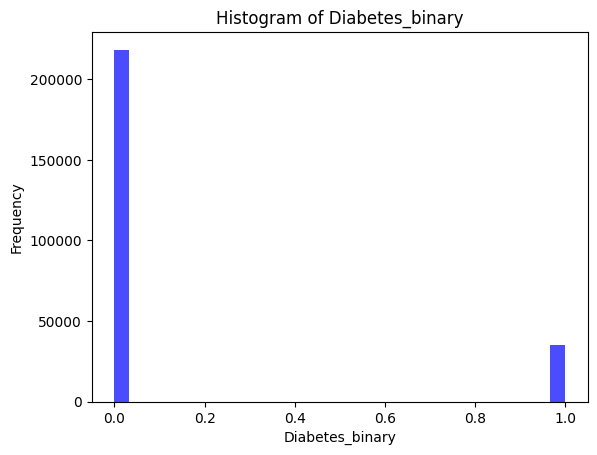

In [29]:
numeric_column = "Diabetes_binary"
data = cdc_data.select(col(numeric_column)).rdd.flatMap(lambda x: x).collect()

plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title(f"Histogram of {numeric_column}")
plt.xlabel(numeric_column)
plt.ylabel("Frequency")
plt.show()

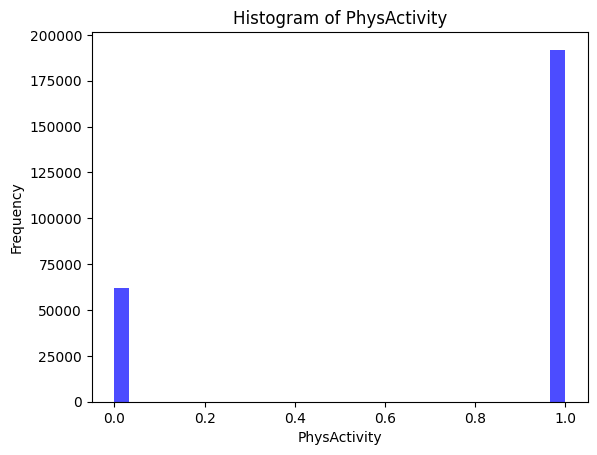

In [30]:
numeric_column = "PhysActivity"
data = cdc_data.select(col(numeric_column)).rdd.flatMap(lambda x: x).collect()

plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title(f"Histogram of {numeric_column}")
plt.xlabel(numeric_column)
plt.ylabel("Frequency")
plt.show()

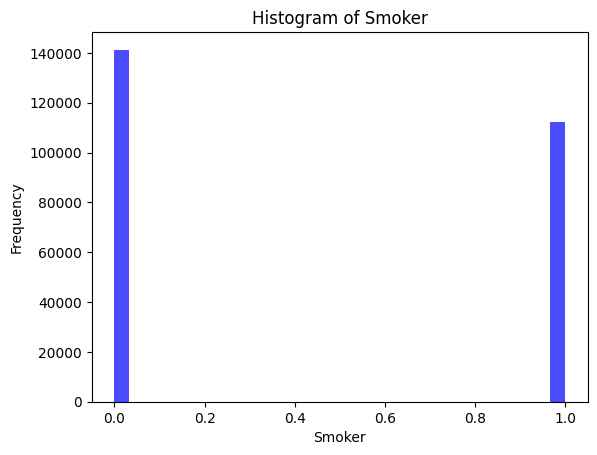

In [31]:
numeric_column = "Smoker"
data = cdc_data.select(col(numeric_column)).rdd.flatMap(lambda x: x).collect()

plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title(f"Histogram of {numeric_column}")
plt.xlabel(numeric_column)
plt.ylabel("Frequency")
plt.show()

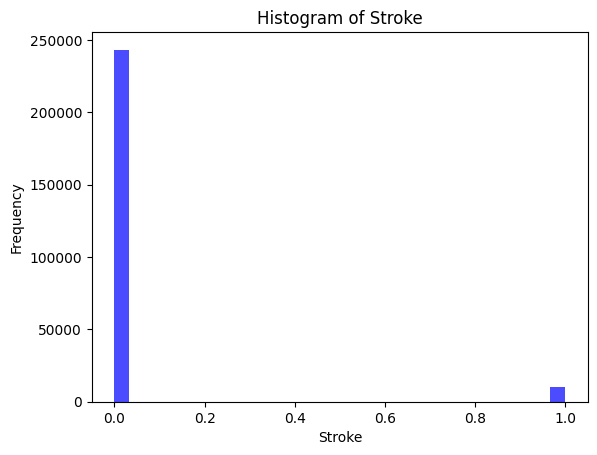

In [32]:
numeric_column = "Stroke"
data = cdc_data.select(col(numeric_column)).rdd.flatMap(lambda x: x).collect()

plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title(f"Histogram of {numeric_column}")
plt.xlabel(numeric_column)
plt.ylabel("Frequency")
plt.show()

**Correlation Matrix**

In [37]:
numeric_columns = ['Diabetes_binary', 'HighBP', 'HighChol','BMI','Smoker','Stroke',
                   'HeartDiseaseorAttack','PhysActivity','MentHlth','PhysHlth','DiffWalk','Sex','Age']

vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_columns, outputCol=vector_col)
cdc_data_vector = assembler.transform(cdc_data).select(vector_col)

correlation_matrix = Correlation.corr(cdc_data_vector, vector_col).head()[0]
print("Correlation Matrix:\n", correlation_matrix.toArray())

Correlation Matrix:
 [[ 1.          0.26312879  0.20027619  0.21684306  0.06078851  0.10581607
   0.17728226 -0.11813311  0.06931508  0.1713367   0.21834435  0.03143
   0.17744187]
 [ 0.26312879  1.          0.2981993   0.21374812  0.09699147  0.12957491
   0.20936121 -0.12526687  0.05645592  0.16121157  0.22361847  0.05220696
   0.34445233]
 [ 0.20027619  0.2981993   1.          0.10672208  0.09129936  0.09262007
   0.18076535 -0.07804619  0.06206915  0.12175053  0.14467154  0.03120533
   0.27231823]
 [ 0.21684306  0.21374812  0.10672208  1.          0.01380447  0.02015266
   0.05290426 -0.14729363  0.08531016  0.12114111  0.19707776  0.0429503
  -0.03661764]
 [ 0.06078851  0.09699147  0.09129936  0.01380447  1.          0.06117267
   0.11444122 -0.08740116  0.09219647  0.11645971  0.12246321  0.09366236
   0.12064108]
 [ 0.10581607  0.12957491  0.09262007  0.02015266  0.06117267  1.
   0.20300194 -0.06915142  0.07017181  0.14894417  0.17656692  0.00297829
   0.1269737 ]
 [ 0.17728226

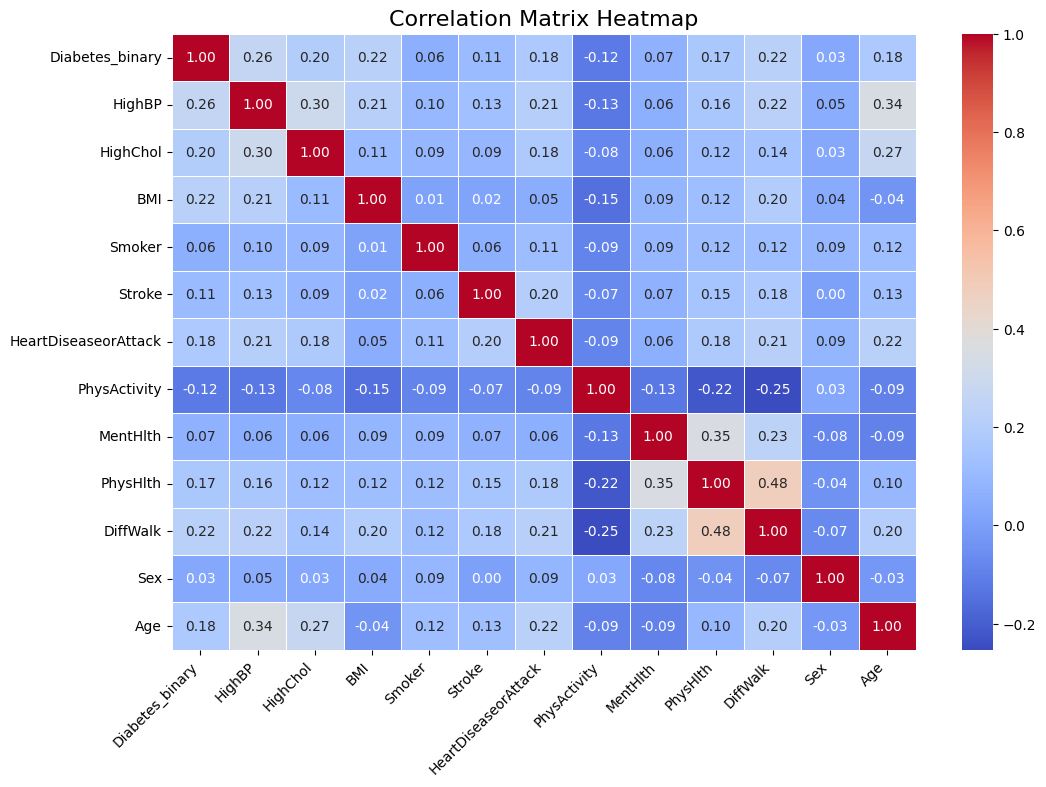

In [38]:
import numpy as np
numeric_columns = ['Diabetes_binary', 'HighBP', 'HighChol','BMI','Smoker','Stroke',
                   'HeartDiseaseorAttack','PhysActivity','MentHlth','PhysHlth','DiffWalk','Sex','Age']

vector_col = "features"
assembler = VectorAssembler(inputCols=numeric_columns, outputCol=vector_col)
vectorized_data = assembler.transform(cdc_data).select(vector_col)


correlation_matrix = Correlation.corr(vectorized_data, vector_col).head()[0]


corr_matrix_array = np.array(correlation_matrix.toArray())
corr_matrix_df = pd.DataFrame(corr_matrix_array, columns=numeric_columns, index=numeric_columns)


plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

Conclusions from the graph GenHlth and PhysHlth are highly correleted with each other.(positive relation)
GenHlth and Income are highly correleted with each other .(negetive relation)
Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.
HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies ,
HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary.

**Diabetic People Count**

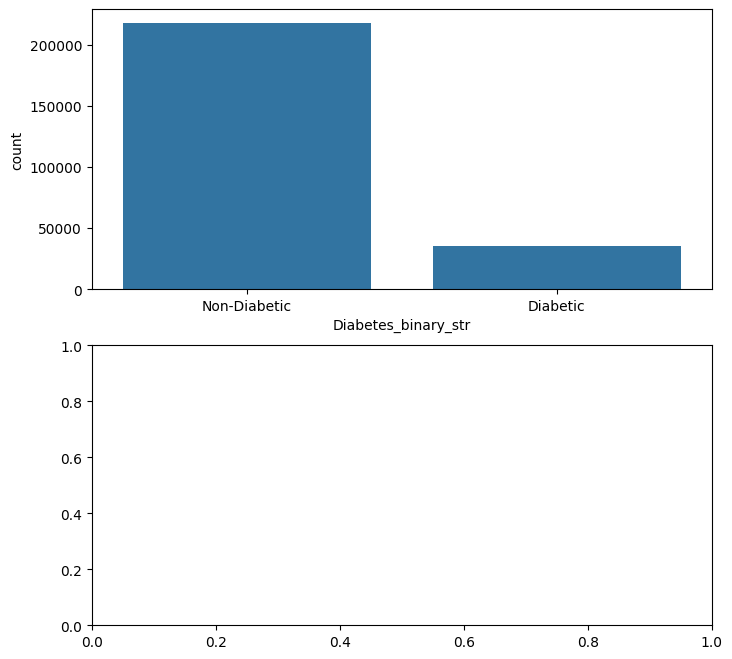

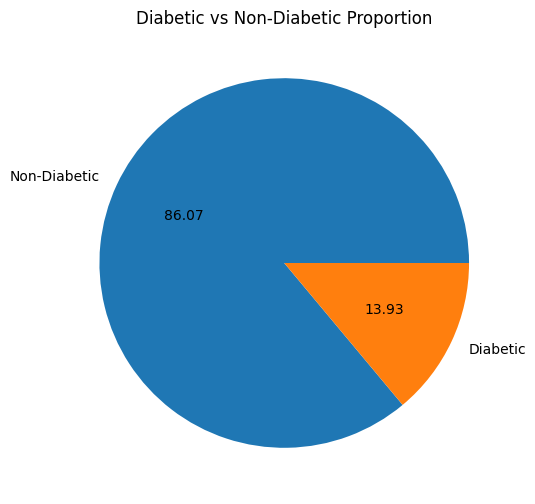

In [39]:
warnings.filterwarnings('ignore')

cdc_data = cdc_data.withColumn("Diabetes_binary_str",
                               when(col("Diabetes_binary") == 0, "Non-Diabetic")
                               .otherwise("Diabetic"))
cdc_data_pd = cdc_data.select("Diabetes_binary_str").toPandas()

figure1, plot1 = plt.subplots(2, 1, figsize=(8, 8))


sns.countplot(data=cdc_data_pd, x="Diabetes_binary_str", ax=plot1[0])


labels = ["Non-Diabetic", "Diabetic"]
diabetes_counts = cdc_data.groupBy("Diabetes_binary").count().toPandas()


plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts['count'], labels=labels, autopct='%.02f')
plt.title('Diabetic vs Non-Diabetic Proportion')
plt.show()

In [40]:
unique_values = {}


for col_name in cdc_data.columns:
    unique_count = cdc_data.select(col_name).distinct().count()
    unique_values[col_name] = unique_count

unique_values_df = pd.DataFrame(unique_values, index=['unique value count']).transpose()

print(unique_values_df)

                      unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8
Diabetes_binary_str                    2


**Diabetes Relationship with Variables**

**HighBP vs Diabetes**

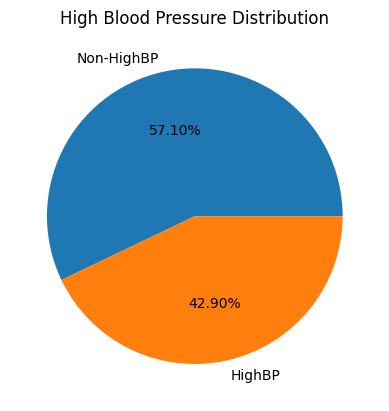

In [41]:

highbp_counts = cdc_data.groupBy("HighBP").count()


highbp_counts_list = highbp_counts.collect()

labels = ["Non-HighBP", "HighBP"]
sizes = [row["count"] for row in highbp_counts_list]

plt.pie(sizes, labels=labels, autopct='%.2f%%')
plt.title('High Blood Pressure Distribution')
plt.show()

In [42]:

crosstab_data = cdc_data.groupBy("HighBP", "Diabetes_binary_str").count()

crosstab_result = crosstab_data.groupBy("HighBP").pivot("Diabetes_binary_str").sum("count")

crosstab_result.show()

+------+--------+------------+
|HighBP|Diabetic|Non-Diabetic|
+------+--------+------------+
|   0.0|    8742|      136109|
|   1.0|   26604|       82225|
+------+--------+------------+



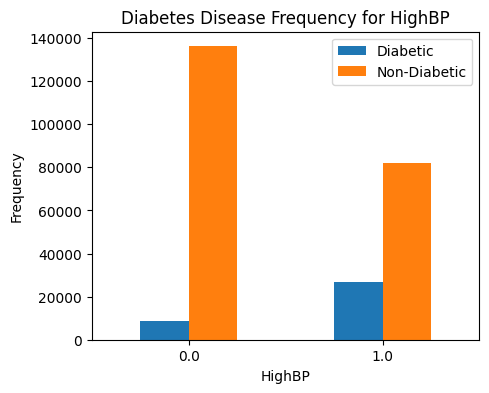

In [43]:

crosstab_data = cdc_data.groupBy("HighBP", "Diabetes_binary_str").count()

crosstab_result = crosstab_data.groupBy("HighBP").pivot("Diabetes_binary_str").sum("count")

crosstab_pandas = crosstab_result.toPandas()

crosstab_pandas.set_index('HighBP').plot(kind='bar', figsize=(5, 4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [44]:

highbp_count = cdc_data.groupBy("Diabetes_binary_str", "HighBP").count().withColumnRenamed("count", "highbp_count")


total_count = cdc_data.groupBy("Diabetes_binary_str").count().withColumnRenamed("count", "total_count")

joined_data = highbp_count.join(total_count, on="Diabetes_binary_str", how="inner")

result = joined_data.withColumn(
    "percentage",
    (F.col("highbp_count") / F.col("total_count")) * 100
)

result.select("Diabetes_binary_str", "HighBP", "percentage").show()

+-------------------+------+------------------+
|Diabetes_binary_str|HighBP|        percentage|
+-------------------+------+------------------+
|           Diabetic|   0.0| 24.73264301476829|
|           Diabetic|   1.0| 75.26735698523171|
|       Non-Diabetic|   0.0|62.339809649436184|
|       Non-Diabetic|   1.0|37.660190350563816|
+-------------------+------+------------------+



**High BP vs Diabetes: Conclusion HighBP is a play a major role in Diabetes. When cases of high BP increases then cases of Diabetes also increases.**

**HighCholestrol vs Diabetes**

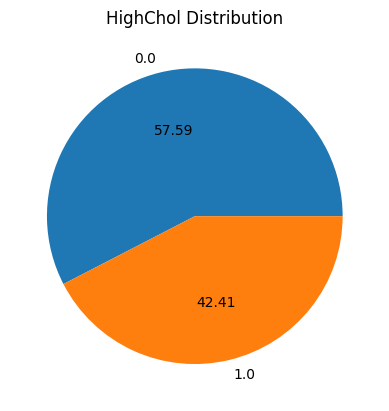

In [45]:

highchol_count = cdc_data.groupBy("HighChol").count()

highchol_pandas = highchol_count.toPandas()

labels = highchol_pandas["HighChol"].values
sizes = highchol_pandas["count"].values

plt.pie(sizes, labels=labels, autopct='%.02f')
plt.title("HighChol Distribution")
plt.show()

In [46]:

crosstab_data = cdc_data.groupBy("HighChol", "Diabetes_binary_str").count()

crosstab_result = crosstab_data.groupBy("HighChol").pivot("Diabetes_binary_str").sum("count")

crosstab_result.show()

+--------+--------+------------+
|HighChol|Diabetic|Non-Diabetic|
+--------+--------+------------+
|     0.0|   11660|      134429|
|     1.0|   23686|       83905|
+--------+--------+------------+



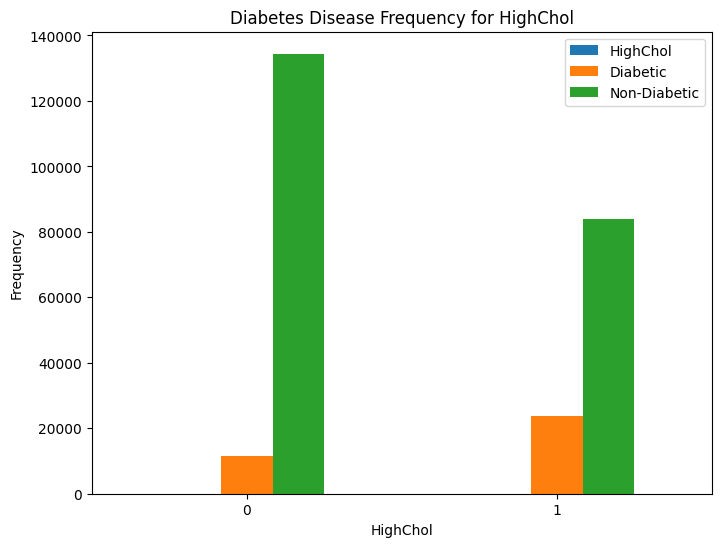

In [47]:
crosstab_data = cdc_data.groupBy("HighChol", "Diabetes_binary_str").count()

crosstab_result = crosstab_data.groupBy("HighChol").pivot("Diabetes_binary_str").sum("count")

crosstab_pandas = crosstab_result.toPandas()

crosstab_pandas.plot(kind="bar", figsize=(8, 6))

plt.title('Diabetes Disease Frequency for HighChol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [48]:

highchol_count = cdc_data.groupBy("Diabetes_binary_str", "HighChol").count()

total_count = cdc_data.groupBy("Diabetes_binary_str").count().withColumnRenamed("count", "total_count")

joined_data = highchol_count.join(total_count, on="Diabetes_binary_str", how="inner")

result = joined_data.withColumn(
    "percentage",
    (F.col("count") / F.col("total_count")) * 100
)

result.select("Diabetes_binary_str", "HighChol", "percentage").show()

+-------------------+--------+------------------+
|Diabetes_binary_str|HighChol|        percentage|
+-------------------+--------+------------------+
|           Diabetic|     0.0| 32.98817405081198|
|           Diabetic|     1.0| 67.01182594918804|
|       Non-Diabetic|     0.0|61.570346350087476|
|       Non-Diabetic|     1.0|38.429653649912524|
+-------------------+--------+------------------+



**High Cholesterol vs Diabetes:** conclusions HighChol is a play a major role in Diabetes. When cases of highChol increases, then cases of Diabetes also increases

**[High BP + High Cholesterol] vs Diabetes**

In [49]:

diabetes_count = cdc_data.groupBy("HighBP", "HighChol", "Diabetes_binary_str").count()

total_count = cdc_data.groupBy("HighBP", "HighChol").count().withColumnRenamed("count", "total_count")

joined_data = diabetes_count.join(total_count, on=["HighBP", "HighChol"], how="inner")

result = joined_data.withColumn(
    "percentage",
    (F.col("count") / F.col("total_count")) * 100
)

result.select("HighBP", "HighChol", "Diabetes_binary_str", "percentage").show()

+------+--------+-------------------+------------------+
|HighBP|HighChol|Diabetes_binary_str|        percentage|
+------+--------+-------------------+------------------+
|   1.0|     1.0|       Non-Diabetic| 70.28611197030622|
|   1.0|     1.0|           Diabetic| 29.71388802969378|
|   0.0|     1.0|           Diabetic|10.419044513288766|
|   0.0|     1.0|       Non-Diabetic| 89.58095548671123|
|   1.0|     0.0|       Non-Diabetic| 83.26654440897462|
|   1.0|     0.0|           Diabetic| 16.73345559102538|
|   0.0|     0.0|       Non-Diabetic| 95.81142072213501|
|   0.0|     0.0|           Diabetic| 4.188579277864992|
+------+--------+-------------------+------------------+



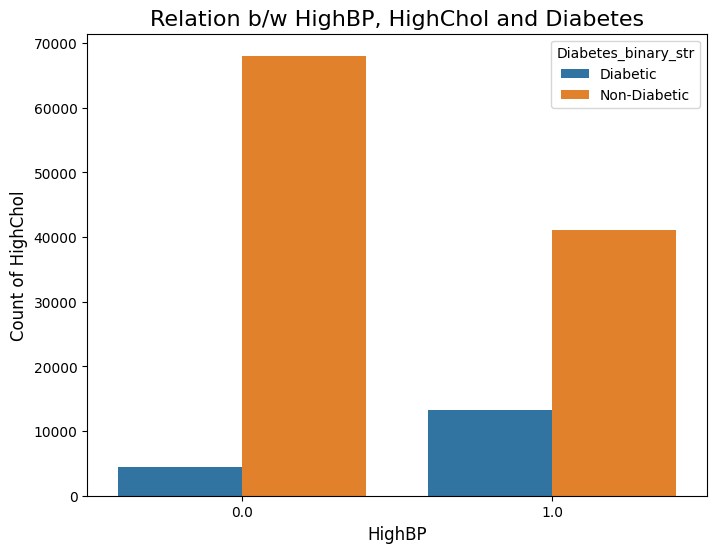

In [50]:

grouped_data = cdc_data.groupBy("HighBP", "HighChol", "Diabetes_binary_str").count()

grouped_pandas = grouped_data.toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(x="HighBP", y="count", hue="Diabetes_binary_str", data=grouped_pandas, ci=None)

plt.title("Relation b/w HighBP, HighChol and Diabetes", fontsize=16)
plt.xlabel("HighBP", fontsize=12)
plt.ylabel("Count of HighChol", fontsize=12)
plt.xticks(rotation=0)

plt.show()

**[ HighBP + High Cholestrol ] vs Diabetes :**

Conclusions
Acording to this data, HighBP and HighChol both togather increase the risk of diabetes.

In [51]:
import plotly.express as px

bmi_count = cdc_data.groupBy("BMI").count()


bmi_count_pandas = bmi_count.toPandas()

fig = px.treemap(bmi_count_pandas,
                 path=['BMI'],
                 values='count',
                 title="BMI Counts")

fig.show()

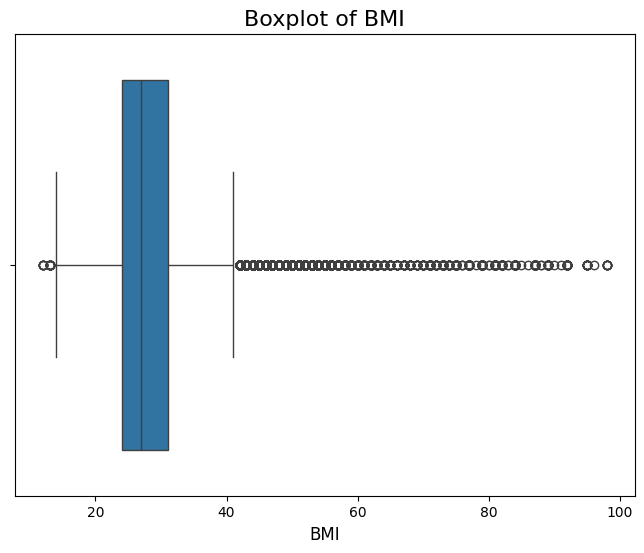

In [52]:

bmi_summary = cdc_data.describe(["BMI"])

bmi_summary_pd = bmi_summary.toPandas()

plt.figure(figsize=(8, 6))
sns.boxplot(x=cdc_data.toPandas()["BMI"])

plt.title("Boxplot of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=12)

plt.show()

**Split the data into multiple group**

First Group

In [53]:

filtered_data = cdc_data.filter(cdc_data["BMI"] <= 20)

diabetes_count = filtered_data.groupBy("Diabetes_binary").count()

diabetes_count.show()

+---------------+-----+
|Diabetes_binary|count|
+---------------+-----+
|            0.0|12877|
|            1.0|  545|
+---------------+-----+



Second Group

In [54]:

BMI_2 = cdc_data.filter((cdc_data["BMI"] > 20) & (cdc_data["BMI"] <= 50))

length_of_BMI_2 = BMI_2.count()

print("len of BMI_2 : ", length_of_BMI_2)

len of BMI_2 :  238083


Third Group

In [55]:

filtered_data = cdc_data.filter((cdc_data["BMI"] > 20) & (cdc_data["BMI"] <= 50))

diabetes_count = filtered_data.groupBy("Diabetes_binary_str").count()

diabetes_count.show()

+-------------------+------+
|Diabetes_binary_str| count|
+-------------------+------+
|           Diabetic| 34098|
|       Non-Diabetic|203985|
+-------------------+------+



In [56]:

filtered_data = cdc_data.filter((cdc_data["BMI"] > 50) & (cdc_data["BMI"] <= 100))

diabetes_count = filtered_data.groupBy("Diabetes_binary").count()

diabetes_count.show()

+---------------+-----+
|Diabetes_binary|count|
+---------------+-----+
|            0.0| 1472|
|            1.0|  703|
+---------------+-----+



**BMI vs Diabetes: Conclusions **

Most numbers of diabetic people's BMI is between 20 to 50
So we can say 20-50 BMI group have significant effect on Diabetes
BMI have some outliers

**Smokers vs Diabetes**

In [57]:

cross_tab = cdc_data.groupBy("Smoker", "Diabetes_binary_str").count()

cross_tab.show()

+------+-------------------+------+
|Smoker|Diabetes_binary_str| count|
+------+-------------------+------+
|   1.0|           Diabetic| 18317|
|   0.0|       Non-Diabetic|124228|
|   0.0|           Diabetic| 17029|
|   1.0|       Non-Diabetic| 94106|
+------+-------------------+------+



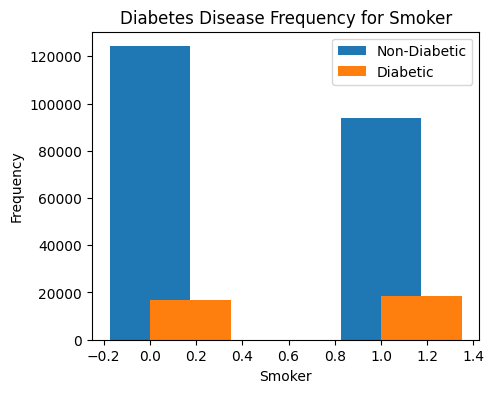

In [58]:

cross_tab = cdc_data.groupBy("Smoker", "Diabetes_binary_str").count()

count_dict = {}
for row in cross_tab.collect():
    smoker = row['Smoker']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if smoker not in count_dict:
        count_dict[smoker] = {}
    count_dict[smoker][diabetes_status] = count

smoker_labels = sorted(count_dict.keys())
non_diabetic = [count_dict[smoker].get("Non-Diabetic", 0) for smoker in smoker_labels]
diabetic = [count_dict[smoker].get("Diabetic", 0) for smoker in smoker_labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(smoker_labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(smoker_labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for Smoker')
ax.set_xlabel("Smoker")
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

Smoker vs Diabetes Acording to this data, Only smoking has a minor effect on diabetes.
Smoking is injurious to health.

**Heavy Alcohol Consumption vs Diabetes**

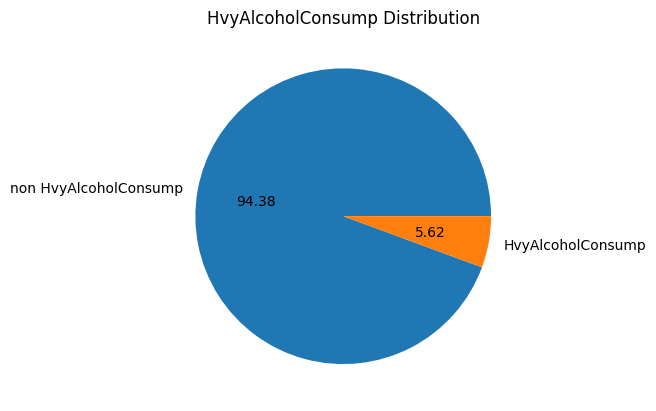

In [59]:

alcohol_counts = cdc_data.groupBy("HvyAlcoholConsump").count()

alcohol_counts_list = alcohol_counts.collect()

labels = ["non HvyAlcoholConsump", "HvyAlcoholConsump"]
sizes = [row['count'] for row in alcohol_counts_list]

plt.pie(sizes, labels=labels, autopct='%.02f')
plt.title("HvyAlcoholConsump Distribution")
plt.show()

In [60]:

cross_tab = cdc_data.groupBy("HvyAlcoholConsump", "Diabetes_binary_str").count()

cross_tab.show()

+-----------------+-------------------+------+
|HvyAlcoholConsump|Diabetes_binary_str| count|
+-----------------+-------------------+------+
|              1.0|           Diabetic|   832|
|              0.0|       Non-Diabetic|204910|
|              0.0|           Diabetic| 34514|
|              1.0|       Non-Diabetic| 13424|
+-----------------+-------------------+------+



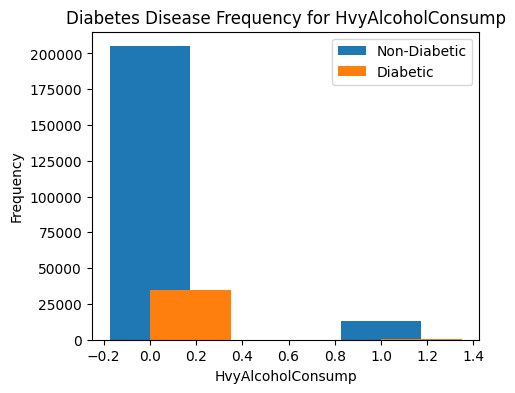

In [61]:

cross_tab = cdc_data.groupBy("HvyAlcoholConsump", "Diabetes_binary_str").count()

cross_tab_data = cross_tab.collect()

count_dict = {}
for row in cross_tab_data:
    hvy_alcohol = row['HvyAlcoholConsump']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if hvy_alcohol not in count_dict:
        count_dict[hvy_alcohol] = {}
    count_dict[hvy_alcohol][diabetes_status] = count

labels = sorted(count_dict.keys())
non_diabetic = [count_dict[hvy].get("Non-Diabetic", 0) for hvy in labels]
diabetic = [count_dict[hvy].get("Diabetic", 0) for hvy in labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for HvyAlcoholConsump')
ax.set_xlabel("HvyAlcoholConsump")
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

**Heavy Alcohol Consumption vs Diabetes**


Acording to this data,There is not enugh information here about heavy alcohol consumption, so we can not predict the effect of HvyAlcoholConsump on Diabetes, despites its effect on health otherwise

**Life Style : PhysActivity, Fruits and Veggies effect on Diabetes**

In [62]:

cross_tab = cdc_data.groupBy("PhysActivity", "Diabetes_binary_str").count()

cross_tab.show()

+------------+-------------------+------+
|PhysActivity|Diabetes_binary_str| count|
+------------+-------------------+------+
|         1.0|           Diabetic| 22287|
|         0.0|       Non-Diabetic| 48701|
|         0.0|           Diabetic| 13059|
|         1.0|       Non-Diabetic|169633|
+------------+-------------------+------+



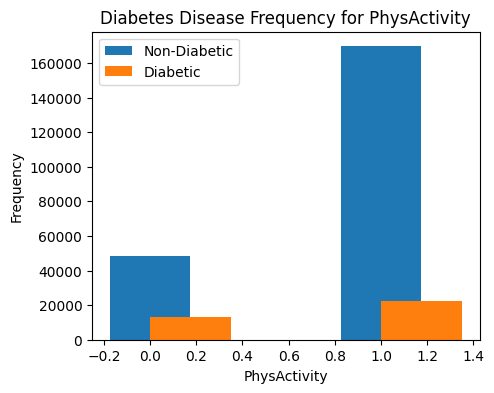

In [63]:

cross_tab = cdc_data.groupBy("PhysActivity", "Diabetes_binary_str").count()

cross_tab_data = cross_tab.collect()

count_dict = {}
for row in cross_tab_data:
    phys_activity = row['PhysActivity']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if phys_activity not in count_dict:
        count_dict[phys_activity] = {}
    count_dict[phys_activity][diabetes_status] = count

labels = sorted(count_dict.keys())
non_diabetic = [count_dict[phys].get("Non-Diabetic", 0) for phys in labels]
diabetic = [count_dict[phys].get("Diabetic", 0) for phys in labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for PhysActivity')
ax.set_xlabel("PhysActivity")
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

In [64]:

cross_tab = cdc_data.groupBy("Fruits", "Diabetes_binary_str").count()

cross_tab.show()

+------+-------------------+------+
|Fruits|Diabetes_binary_str| count|
+------+-------------------+------+
|   1.0|           Diabetic| 20693|
|   0.0|       Non-Diabetic| 78129|
|   0.0|           Diabetic| 14653|
|   1.0|       Non-Diabetic|140205|
+------+-------------------+------+



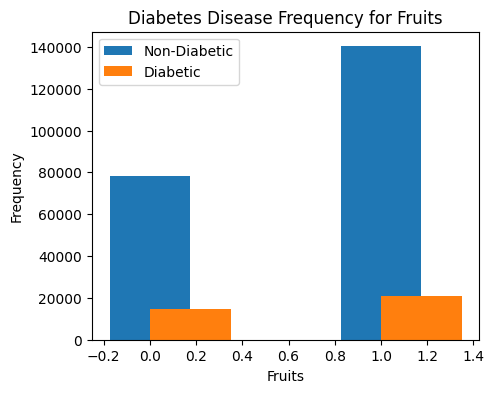

In [65]:

cross_tab = cdc_data.groupBy("Fruits", "Diabetes_binary_str").count()

cross_tab_data = cross_tab.collect()

count_dict = {}
for row in cross_tab_data:
    fruits = row['Fruits']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if fruits not in count_dict:
        count_dict[fruits] = {}
    count_dict[fruits][diabetes_status] = count

labels = sorted(count_dict.keys())
non_diabetic = [count_dict[fruit].get("Non-Diabetic", 0) for fruit in labels]
diabetic = [count_dict[fruit].get("Diabetic", 0) for fruit in labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for Fruits')
ax.set_xlabel("Fruits")
ax.set_ylabel('Frequency')
ax.legend()

# Step 7: Show the plot
plt.show()

In [66]:

cross_tab = cdc_data.groupBy("Veggies", "Diabetes_binary_str").count()

cross_tab.show()

+-------+-------------------+------+
|Veggies|Diabetes_binary_str| count|
+-------+-------------------+------+
|    1.0|           Diabetic| 26736|
|    0.0|       Non-Diabetic| 39229|
|    0.0|           Diabetic|  8610|
|    1.0|       Non-Diabetic|179105|
+-------+-------------------+------+



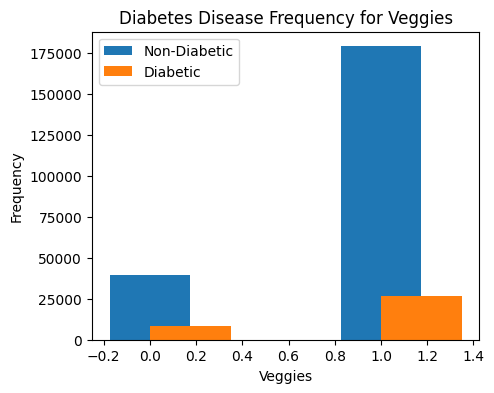

In [67]:

cross_tab = cdc_data.groupBy("Veggies", "Diabetes_binary_str").count()

cross_tab_data = cross_tab.collect()

count_dict = {}
for row in cross_tab_data:
    veggies = row['Veggies']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if veggies not in count_dict:
        count_dict[veggies] = {}
    count_dict[veggies][diabetes_status] = count

labels = sorted(count_dict.keys())
non_diabetic = [count_dict[veg].get("Non-Diabetic", 0) for veg in labels]
diabetic = [count_dict[veg].get("Diabetic", 0) for veg in labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for Veggies')
ax.set_xlabel("Veggies")
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

**LifeStyle vs Diabetes**

1.Physical activity reduces the risk of diabetes.

2.Eating at least one fruit a day reduces the risk of diabetes.

3.Eating at least one veggies a day slower the risk of diabetes.

4.Healthy lifestyle is the key of healthy body.

**Healthcare services :** AnyHealthcare and NoDocbcCost's effect on Diabetes

In [68]:

cross_tab = cdc_data.groupBy("AnyHealthcare", "Diabetes_binary_str").count()

cross_tab.show()

+-------------+-------------------+------+
|AnyHealthcare|Diabetes_binary_str| count|
+-------------+-------------------+------+
|          1.0|           Diabetic| 33924|
|          0.0|       Non-Diabetic| 10995|
|          0.0|           Diabetic|  1422|
|          1.0|       Non-Diabetic|207339|
+-------------+-------------------+------+



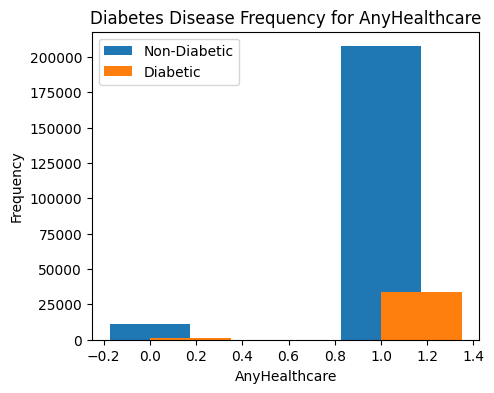

In [69]:

cross_tab = cdc_data.groupBy("AnyHealthcare", "Diabetes_binary_str").count()

cross_tab_data = cross_tab.collect()

count_dict = {}
for row in cross_tab_data:
    healthcare = row['AnyHealthcare']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if healthcare not in count_dict:
        count_dict[healthcare] = {}
    count_dict[healthcare][diabetes_status] = count

labels = sorted(count_dict.keys())
non_diabetic = [count_dict[hc].get("Non-Diabetic", 0) for hc in labels]
diabetic = [count_dict[hc].get("Diabetic", 0) for hc in labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for AnyHealthcare')
ax.set_xlabel("AnyHealthcare")
ax.set_ylabel('Frequency')
ax.legend()

plt.show()


In [70]:

cross_tab = cdc_data.groupBy("NoDocbcCost", "Diabetes_binary_str").count()

cross_tab.show()

+-----------+-------------------+------+
|NoDocbcCost|Diabetes_binary_str| count|
+-----------+-------------------+------+
|        1.0|           Diabetic|  3742|
|        0.0|       Non-Diabetic|200722|
|        0.0|           Diabetic| 31604|
|        1.0|       Non-Diabetic| 17612|
+-----------+-------------------+------+



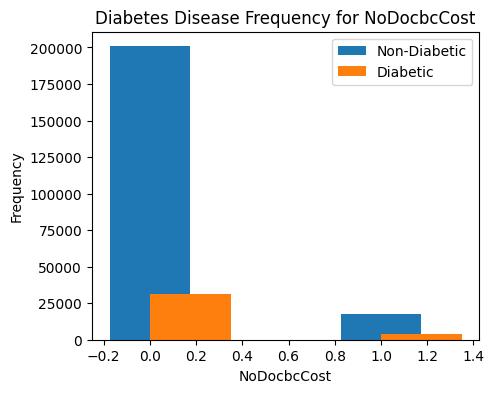

In [71]:

cross_tab = cdc_data.groupBy("NoDocbcCost", "Diabetes_binary_str").count()

cross_tab_data = cross_tab.collect()

count_dict = {}
for row in cross_tab_data:
    docbc_cost = row['NoDocbcCost']
    diabetes_status = row['Diabetes_binary_str']
    count = row['count']

    if docbc_cost not in count_dict:
        count_dict[docbc_cost] = {}
    count_dict[docbc_cost][diabetes_status] = count

labels = sorted(count_dict.keys())
non_diabetic = [count_dict[docbc_cost].get("Non-Diabetic", 0) for docbc_cost in labels]
diabetic = [count_dict[docbc_cost].get("Diabetic", 0) for docbc_cost in labels]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(labels, non_diabetic, width=bar_width, label="Non-Diabetic", align="center")
ax.bar(labels, diabetic, width=bar_width, label="Diabetic", align="edge")

ax.set_title('Diabetes Disease Frequency for NoDocbcCost')
ax.set_xlabel("NoDocbcCost")
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

**Health : GenHlth , MentHlth , PhysHlth and DiffWalk's vs Diabetes**

In [72]:

genhlth_data = cdc_data.groupBy("GenHlth").count()

genhlth_df = genhlth_data.toPandas()

fig = px.treemap(genhlth_df, path=['GenHlth'], values='count', title="GenHlth counts")

fig.show()

In [73]:

cross_tab = cdc_data.groupBy("GenHlth", "Diabetes_binary_str").count()

cross_tab_pivot = cross_tab.groupBy("GenHlth").pivot("Diabetes_binary_str").sum("count")

cross_tab_pivot.show()

+-------+--------+------------+
|GenHlth|Diabetic|Non-Diabetic|
+-------+--------+------------+
|    1.0|    1140|       44159|
|    4.0|    9790|       21780|
|    3.0|   13457|       62189|
|    2.0|    6381|       82703|
|    5.0|    4578|        7503|
+-------+--------+------------+



In [74]:

menthlth_counts = cdc_data.groupBy("MentHlth").count()

menthlth_counts_list = menthlth_counts.collect()

data_dict = {"MentHlth": [], "count": []}
for row in menthlth_counts_list:
    data_dict["MentHlth"].append(row["MentHlth"])
    data_dict["count"].append(row["count"])

fig = px.treemap(data_dict, path=["MentHlth"], values="count", title="MentHlth counts")

fig.show()

In [75]:

cross_tab = cdc_data.groupBy("MentHlth", "Diabetes_binary_str").count()

cross_tab_pivot = cross_tab.groupBy("MentHlth").pivot("Diabetes_binary_str").agg(F.sum("count"))

cross_tab_pivot.show()

+--------+--------+------------+
|MentHlth|Diabetic|Non-Diabetic|
+--------+--------+------------+
|     8.0|     110|         529|
|     0.0|   23403|      152277|
|     7.0|     405|        2695|
|    29.0|      30|         128|
|    18.0|      20|          77|
|     1.0|     812|        7726|
|    25.0|     273|         915|
|     4.0|     489|        3300|
|    23.0|       8|          30|
|    11.0|       3|          38|
|    21.0|      48|         179|
|    14.0|     198|         969|
|    22.0|      11|          52|
|     3.0|     924|        6457|
|    19.0|       4|          12|
|    28.0|      57|         270|
|     2.0|    1508|       11546|
|    17.0|      11|          43|
|    27.0|      12|          67|
|    10.0|    1064|        5309|
+--------+--------+------------+
only showing top 20 rows



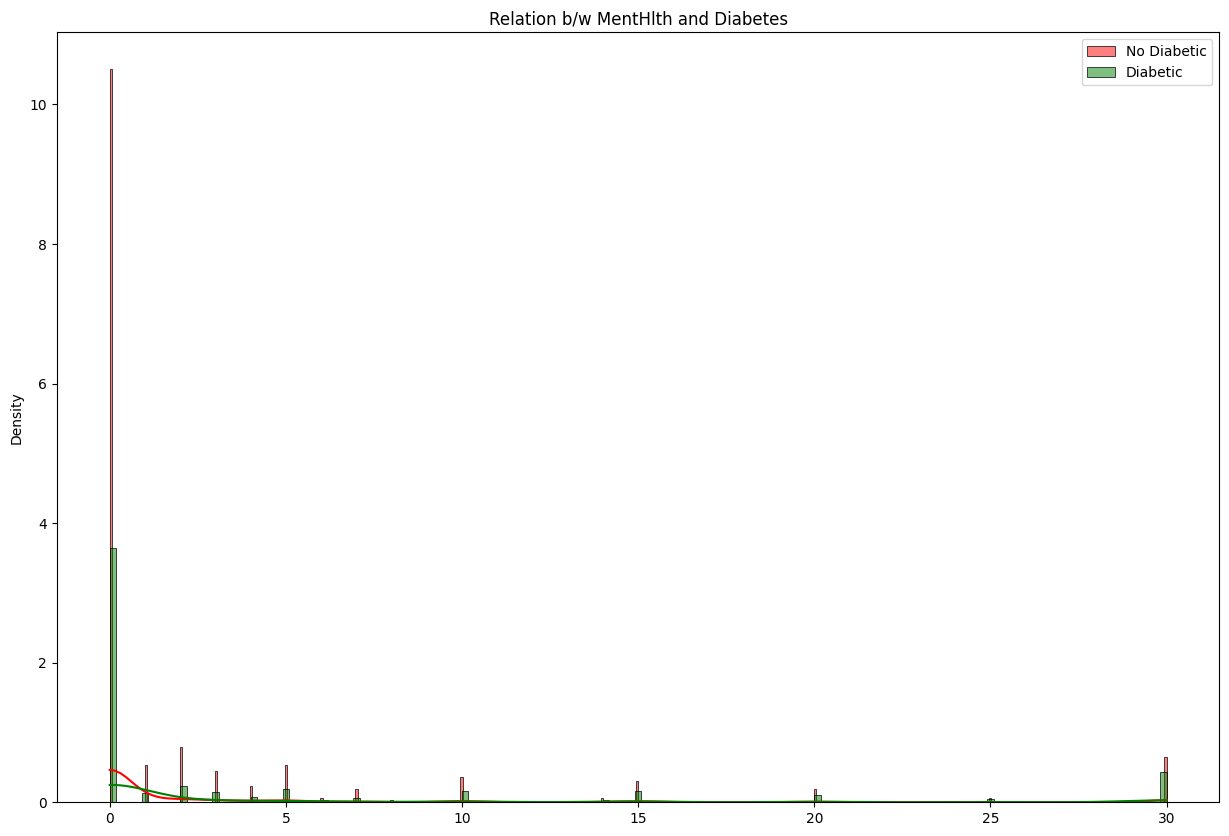

In [76]:

non_diabetic = cdc_data.filter(cdc_data.Diabetes_binary == 0).select("MentHlth").rdd.flatMap(lambda x: x).collect()
diabetic = cdc_data.filter(cdc_data.Diabetes_binary == 1).select("MentHlth").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(15, 10))

sns.histplot(non_diabetic, color="r", label="No Diabetic", kde=True, stat='density', linewidth=0.5)
sns.histplot(diabetic, color="g", label="Diabetic", kde=True, stat='density', linewidth=0.5)

plt.title("Relation b/w MentHlth and Diabetes")
plt.legend()

plt.show()

In [77]:

physhlth_counts = cdc_data.groupBy("PhysHlth").count()

physhlth_counts_pd = physhlth_counts.toPandas()

fig = px.treemap(physhlth_counts_pd, path=['PhysHlth'], values='count', title="PhysHlth counts")
fig.show()

In [78]:

cross_tab = cdc_data.groupBy("PhysHlth", "Diabetes_binary_str").count()

pivot_table = cross_tab.groupBy("PhysHlth").pivot("Diabetes_binary_str").agg(F.sum("count"))

pivot_table.show()

+--------+--------+------------+
|PhysHlth|Diabetic|Non-Diabetic|
+--------+--------+------------+
|     8.0|     159|         650|
|     0.0|   16740|      143312|
|     7.0|     743|        3795|
|    29.0|      74|         141|
|    18.0|      35|         117|
|     1.0|    1188|       10200|
|    25.0|     394|         942|
|     4.0|     763|        3779|
|    23.0|      16|          40|
|    11.0|      12|          48|
|    21.0|     139|         524|
|    14.0|     473|        2114|
|    22.0|      23|          47|
|     3.0|    1289|        7206|
|    19.0|       3|          19|
|    28.0|     143|         379|
|     2.0|    2028|       12736|
|    17.0|      27|          69|
|    27.0|      21|          78|
|    10.0|    1290|        4305|
+--------+--------+------------+
only showing top 20 rows



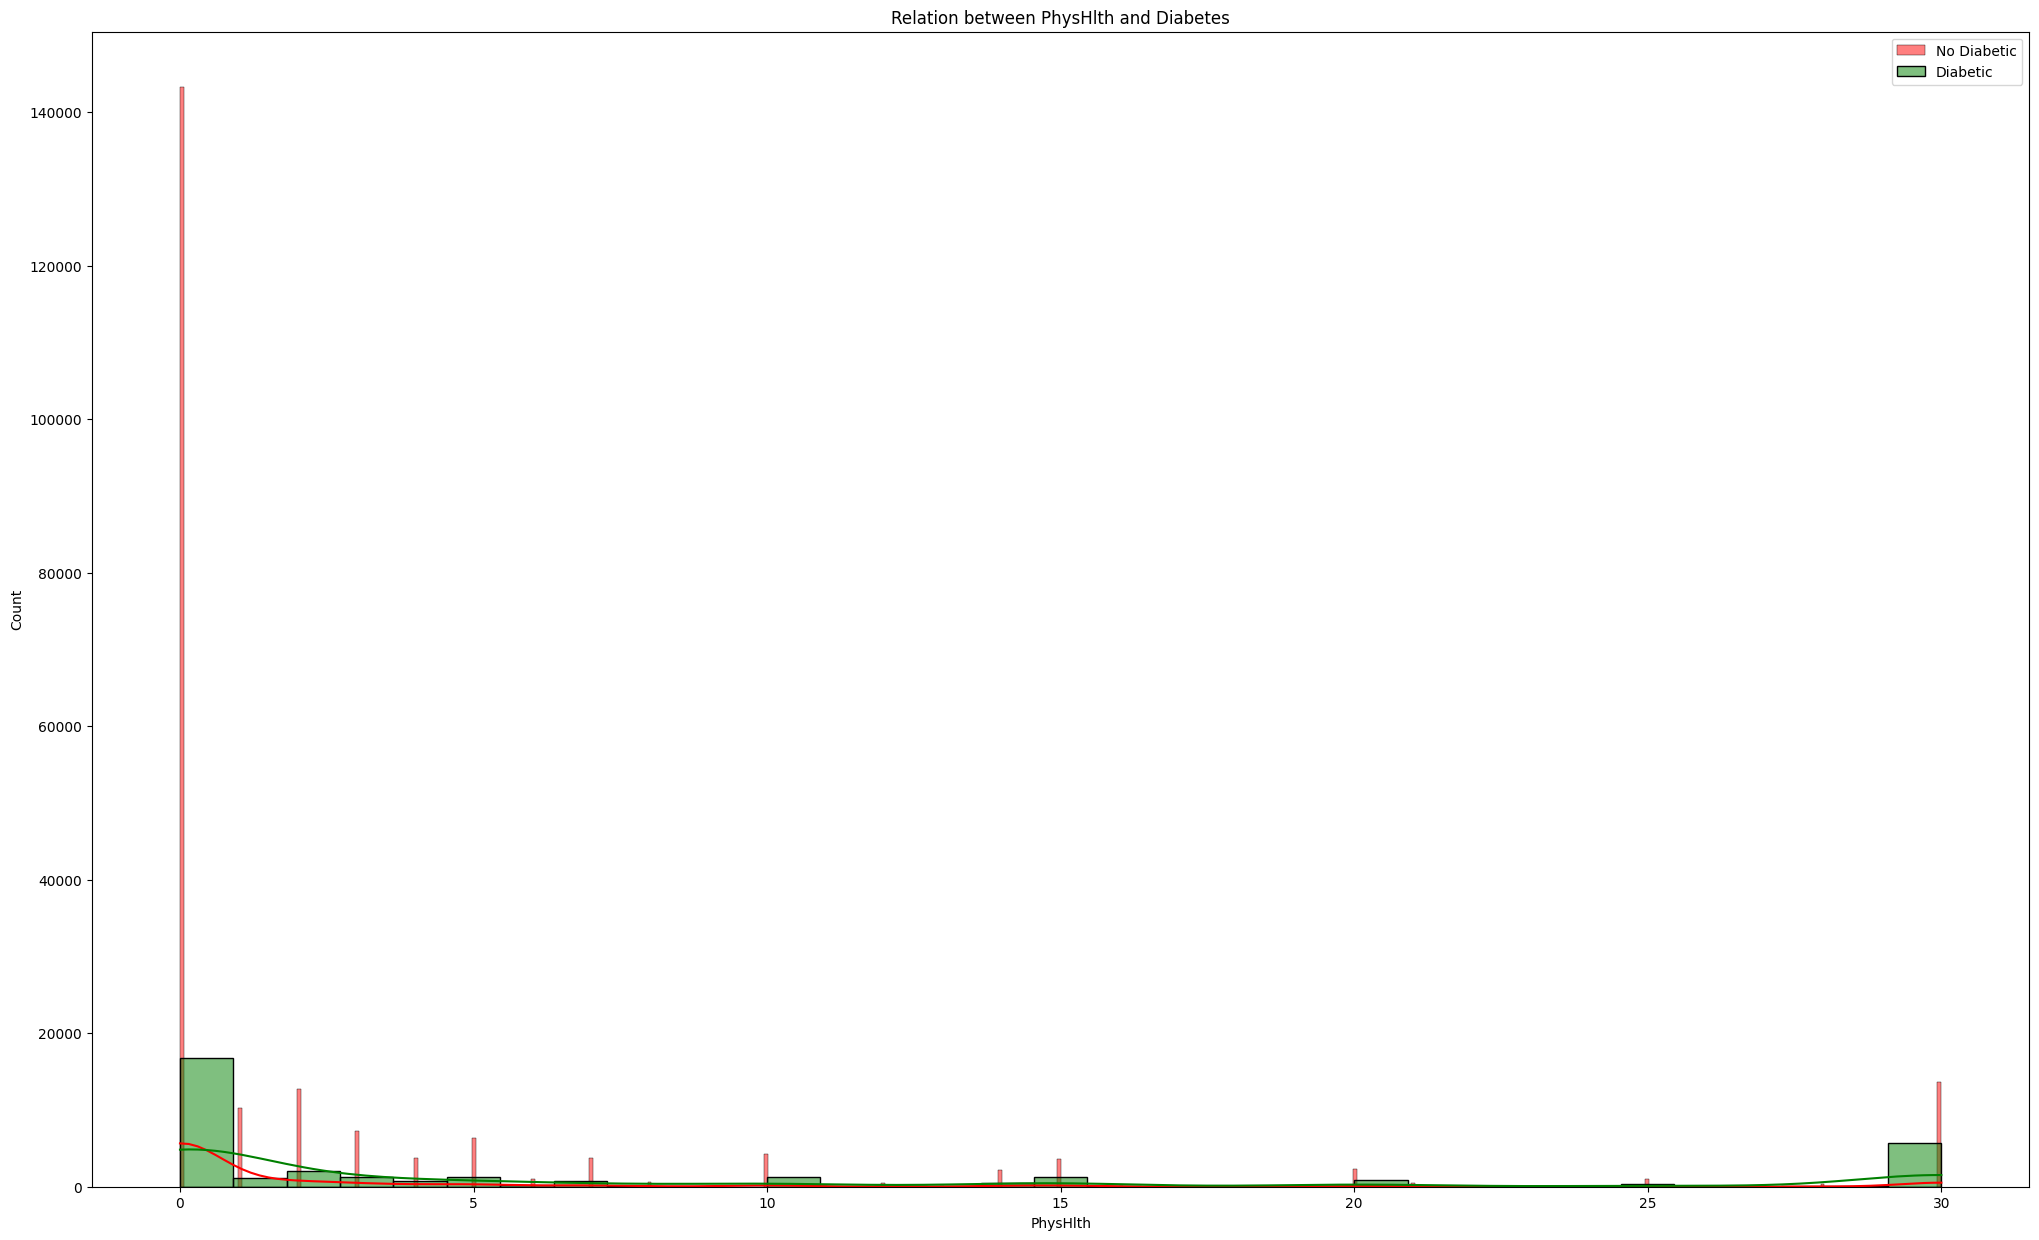

In [79]:

non_diabetic = cdc_data.filter(cdc_data.Diabetes_binary == 0).select("PhysHlth").toPandas()
diabetic = cdc_data.filter(cdc_data.Diabetes_binary == 1).select("PhysHlth").toPandas()

plt.figure(figsize=(25, 15))
warnings.filterwarnings('ignore')

sns.histplot(non_diabetic["PhysHlth"], color="r", kde=True, label="No Diabetic")
sns.histplot(diabetic["PhysHlth"], color="g", kde=True, label="Diabetic")

plt.title("Relation between PhysHlth and Diabetes")
plt.legend()
plt.show()

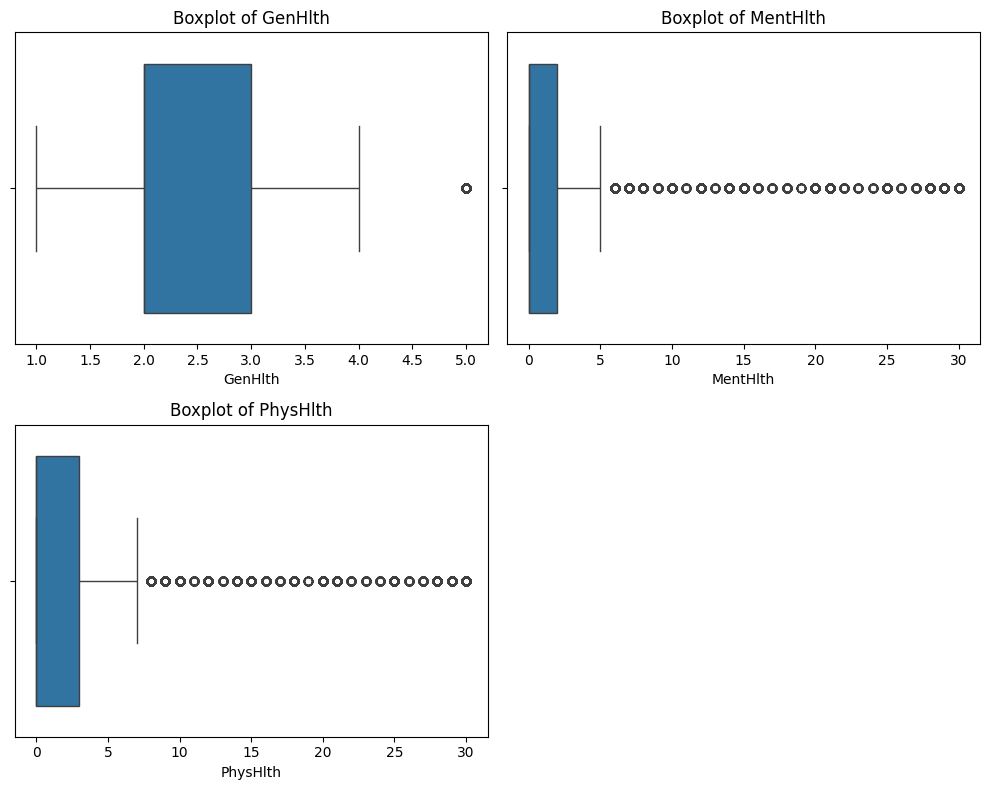

In [80]:

columns = ['GenHlth', 'MentHlth', 'PhysHlth']
cdc_data_pandas = cdc_data.select(*columns).toPandas()

plt.figure(figsize=(10, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=cdc_data_pandas[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [81]:

crosstab_result = cdc_data.groupBy("DiffWalk", "Diabetes_binary_str").agg(F.count("*").alias("count"))

crosstab_result.show()

+--------+-------------------+------+
|DiffWalk|Diabetes_binary_str| count|
+--------+-------------------+------+
|     1.0|           Diabetic| 13121|
|     0.0|       Non-Diabetic|188780|
|     0.0|           Diabetic| 22225|
|     1.0|       Non-Diabetic| 29554|
+--------+-------------------+------+



**Health : GenHlth , MentHlth , PhysHlth and DiffWalk's vs Diabetes**


1.GenHlth has a major effect on diabetes.when GenHlth is not good then the risk of diabetes increases rapidly.


2.MentHlth is a major factor which causes Diabetes.when Menthlth is not stable for long time then the risk of diabetes increases.


3.same goes with PhysHlth

4.About half of people experiencing difficulty walking or climbing have diabetes

5.Mental and physical health has some outliers

**Social : Sex , Age , Education , and Income's vs Diabetes**

In [82]:

crosstab_result = cdc_data.groupBy("Sex", "Diabetes_binary_str").agg(F.count("*").alias("count"))

crosstab_result.show()

+---+-------------------+------+
|Sex|Diabetes_binary_str| count|
+---+-------------------+------+
|1.0|           Diabetic| 16935|
|0.0|       Non-Diabetic|123563|
|0.0|           Diabetic| 18411|
|1.0|       Non-Diabetic| 94771|
+---+-------------------+------+



In [83]:

crosstab_df = cdc_data.crosstab("Age", "Diabetes_binary_str")

crosstab_df.show()

+-----------------------+--------+------------+
|Age_Diabetes_binary_str|Diabetic|Non-Diabetic|
+-----------------------+--------+------------+
|                    1.0|      78|        5622|
|                    9.0|    5733|       27511|
|                   12.0|    3403|       12577|
|                   10.0|    6558|       25636|
|                    5.0|    1051|       15106|
|                    6.0|    1742|       18077|
|                    4.0|     626|       13197|
|                    7.0|    3088|       23226|
|                   11.0|    5141|       18392|
|                    2.0|     140|        7458|
|                    8.0|    4263|       26569|
|                    3.0|     314|       10809|
|                   13.0|    3209|       14154|
+-----------------------+--------+------------+



In [84]:

cross_tab = cdc_data.groupBy("Education", "Diabetes_binary_str").agg(F.count("*").alias("count"))

cross_tab.show()

+---------+-------------------+-----+
|Education|Diabetes_binary_str|count|
+---------+-------------------+-----+
|      3.0|           Diabetic| 2296|
|      2.0|       Non-Diabetic| 2860|
|      2.0|           Diabetic| 1183|
|      5.0|           Diabetic|10354|
|      1.0|           Diabetic|   47|
|      4.0|       Non-Diabetic|51684|
|      4.0|           Diabetic|11066|
|      5.0|       Non-Diabetic|59556|
|      3.0|       Non-Diabetic| 7182|
|      6.0|       Non-Diabetic|96925|
|      1.0|       Non-Diabetic|  127|
|      6.0|           Diabetic|10400|
+---------+-------------------+-----+



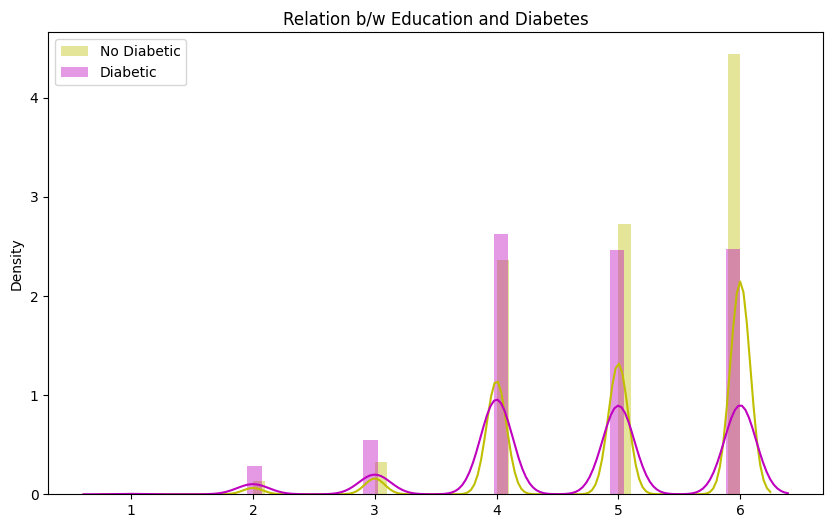

In [85]:

no_diabetic_education = cdc_data.filter(cdc_data.Diabetes_binary == 0).select("Education").rdd.flatMap(lambda x: x).collect()

diabetic_education = cdc_data.filter(cdc_data.Diabetes_binary == 1).select("Education").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
sns.distplot(no_diabetic_education, color="y", label="No Diabetic")
sns.distplot(diabetic_education, color="m", label="Diabetic")

plt.title("Relation b/w Education and Diabetes")
plt.legend()
plt.show()

In [86]:

cross_tab = cdc_data.groupBy('Income', 'Diabetes_binary_str').agg(F.count('*').alias('count'))

cross_tab.show()

+------+-------------------+-----+
|Income|Diabetes_binary_str|count|
+------+-------------------+-----+
|   7.0|           Diabetic| 5265|
|   3.0|           Diabetic| 3568|
|   2.0|       Non-Diabetic| 8697|
|   8.0|           Diabetic| 7195|
|   2.0|           Diabetic| 3086|
|   5.0|           Diabetic| 4504|
|   1.0|           Diabetic| 2383|
|   4.0|       Non-Diabetic|16081|
|   4.0|           Diabetic| 4054|
|   5.0|       Non-Diabetic|21379|
|   8.0|       Non-Diabetic|83190|
|   3.0|       Non-Diabetic|12426|
|   6.0|       Non-Diabetic|31179|
|   7.0|       Non-Diabetic|37954|
|   1.0|       Non-Diabetic| 7428|
|   6.0|           Diabetic| 5291|
+------+-------------------+-----+



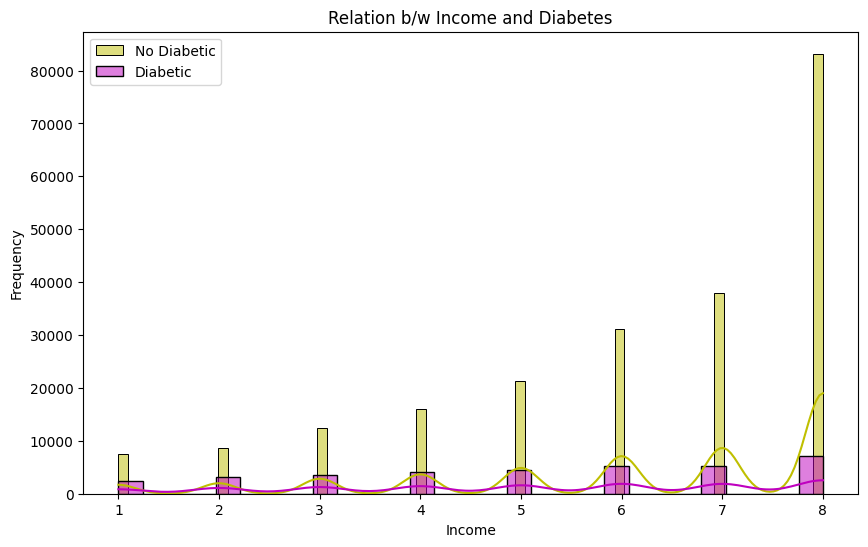

In [87]:

no_diabetic = cdc_data.filter(cdc_data.Diabetes_binary == 0).select('Income').rdd.flatMap(lambda x: x).collect()
diabetic = cdc_data.filter(cdc_data.Diabetes_binary == 1).select('Income').rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(10, 6))
sns.histplot(no_diabetic, color="y", kde=True, label="No Diabetic")
sns.histplot(diabetic, color="m", kde=True, label="Diabetic")

plt.title("Relation b/w Income and Diabetes")
plt.xlabel("Income")
plt.ylabel("Frequency")

plt.legend()
plt.show()

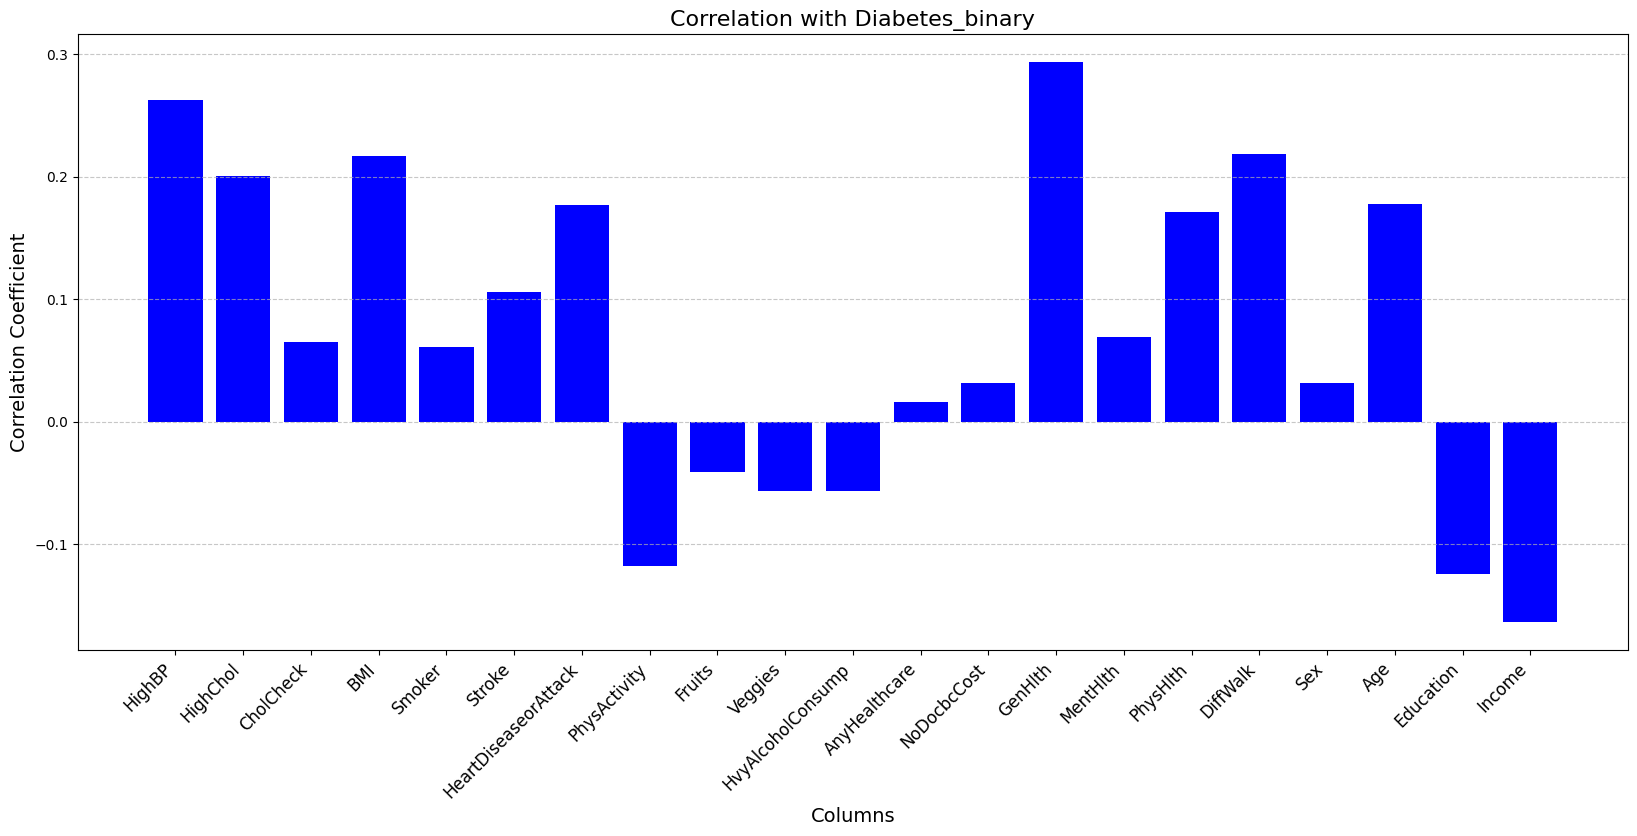

In [90]:

numeric_columns = [col for col, dtype in cdc_data.dtypes if dtype in ("int", "double") and col != "Diabetes_binary"]

diabetes_col = "Diabetes_binary"

correlations = {}
for column in numeric_columns:
    corr_value = cdc_data.stat.corr(column, diabetes_col)
    correlations[column] = corr_value

corr_values = list(correlations.values())
column_names = list(correlations.keys())

plt.figure(figsize=(20, 8))
plt.bar(column_names, corr_values, color='blue')
plt.title("Correlation with Diabetes_binary", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Correlation Coefficient", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Social : Sex , Age , Education , and Income's vs Diabetes : Conclusion**

male and female are equally vulnerable for Diabetes.

people older than 45 are more vulnerable for diabetes then the younger ones.

when the age increase the number of diabetic people also increas.

when Education is going Higher the number of Diabetic people is decreasing.

people with lower income has more risk of diabetes then the Higher ones.

**EDA: CDC Data : Conclusions**

Target Feature of the Data is Diabetes_binary.

dataset has 15 Discrete type and 7 continuous type feature variables.

Dataset dose not have missing values(null values).

major feature variables for Diabetes are : HIghBP , HighChol , BMI, PhysicalActivity , GenHlth , MentHlth , PhysHlth , Age , Eduation and Income.
Feature variables which increases the risk of Diabetes togather are : Smoking and HvyAlcoholConsump , Stroke and HeartDiseaseorAttack , HighBP and HighChol.
Feature variable Which is least effective on Diabetes , but they can help in decreasing the risk Diabetes are : Fruits , Veggies , AnyHealthcare , CholChek.